<a href="https://colab.research.google.com/github/maudlcrf/rcg/blob/main/eda_post_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### AI for Retail & Consumer Goods | Group Project | MBD April 2024

Group Members: Maud Lecerf | Cristina Mosquera | Christopher Stephan

# Imports & Color Palette

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Custom Theme
iowa = {
    "layout": {
        "colorway": ["#4c3624", "#ff0651", "#ff7e06", "#74B36B", "#628395",
                     "#996C48", "#FF5C8D", "#FF9633", "#8CC084", "#84A0AE",
                     "#B78B66", "#FF85A9", "#FFB570", "#A7CEA1", "#A9BCC7"],
        "plot_bgcolor": "white",
        "paper_bgcolor": "white",
        "font": {"color": "black"},
        "xaxis": {"gridcolor": "lightgray"},
        "yaxis": {"gridcolor": "lightgray"},
    }
}

# Register themes
pio.templates["iowa"] = iowa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data_post_covid = pd.read_csv("G:\\Drive partagés\\RCG\\Iowa_Liquor_Sales_Post_Covid.csv") #Maud
data_post_covid = pd.read_csv("/content/drive/Shareddrives/RCG/Iowa_Liquor_Sales_Post_Covid.csv")

#drive.mount('/content/drive') #Cris
#data_post_covid = pd.read_csv("/content/drive/MyDrive/Iowa_Liquor_Sales_Post_Covid.csv") #Cris

## Splitting the data into alcohol types

In [ ]:
## Regrouping the original categories into alcohol types
# Define mapping of keywords to subcategories
category_mapping = {
    'RUM': 'RUM',
    'VODKA': 'VODKAS',
    'VODKAS': 'VODKAS',
    'SCHNAPPS': 'SCHNAPPS',
    'BRANDIES': 'BRANDIES',
    'WHISKIES': 'WHISKIES',
    'SCOTCH': 'WHISKIES',
    'GINS': 'GINS',
    'GIN': 'GINS',
    'MEZCAL': 'MEZCAL',
    'TEQUILA': 'TEQUILA',
    'BOURBON': 'BOURBON',
    'LIQUEURS': 'LIQUEURS',
    'LIQUEUR':'LIQUEURS',
    'AMARETTO': 'AMARETTO',
    'CREME': 'CREME',
    'SPIRITS': 'SPIRITS'
}

# Create a new column and assign "OTHERS" by default
data_post_covid['alcohol_type'] = 'OTHERS'

# Loop through mapping and assign subcategories
for keyword, alcohol_type in category_mapping.items():
    data_post_covid.loc[data_post_covid['category_name'].str.contains(keyword, case=False, na=False, regex=True), 'alcohol_type'] = alcohol_type

In [ ]:
data_post_covid.to_csv(r"C:\Users\ginny\Desktop\RCG\Group Work\Iowa_Liquor_Sales_Post_Covid.csv", index=False)

In [ ]:
data_post_covid.nunique()

,0
invoice_item_number,10414198
date,1213
store_number,2445
store_name,2515
address,2531
city,477
zip_code,514
store_location,10803
county_number,99
county,99


In [ ]:
data_post_covid['alcohol_type'].value_counts()

,count
alcohol_type,
VODKAS,2481955
WHISKIES,2093746
LIQUEURS,1377236
RUM,903040
BOURBON,842461
TEQUILA,686286
OTHERS,632709
SCHNAPPS,486618
BRANDIES,421626


In [ ]:
data_post_covid['category_name'].value_counts()

,count
category_name,
AMERICAN VODKAS,1595428
CANADIAN WHISKIES,976635
STRAIGHT BOURBON WHISKIES,787101
WHISKEY LIQUEUR,630916
AMERICAN FLAVORED VODKA,490908
100% AGAVE TEQUILA,461341
SPICED RUM,415297
BLENDED WHISKIES,389725
AMERICAN SCHNAPPS,341068


In [ ]:
#separating the columns into numerical and categorical as it my be helpful later on
numerical_cols = ['pack', 'bottle_volume_(ml)', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_(dollars)',
                  'volume_sold_(liters)', 'volume_sold_(gallons)' ]
categorical_cols = ['invoice_item_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'store_location', 'county_number', 'county',
       'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description' ]

In [ ]:
data_post_covid['date'] = pd.to_datetime(data_post_covid['date'])

# Create new columns
data_post_covid['year'] = data_post_covid['date'].dt.year
data_post_covid['month'] = data_post_covid['date'].dt.month
data_post_covid['year_month'] = data_post_covid['date'].dt.to_period('M')
data_post_covid['weekday'] = data_post_covid['date'].dt.weekday

# Grouping data by alcohol
data_yearly_alcohol = data_post_covid.groupby(['year', 'alcohol_type'])[numerical_cols].sum().reset_index()
data_monthly_alcohol = data_post_covid.groupby(['year', 'month', 'alcohol_type'])[numerical_cols].sum().reset_index()
data_year_month_alcohol = data_post_covid.groupby(['year_month', 'alcohol_type'])[numerical_cols].sum().reset_index()
data_weekday_alcohol = data_post_covid.groupby(['weekday', 'alcohol_type'])[numerical_cols].sum().reset_index()

In [ ]:
# Grouping data by category
data_yearly_category = data_post_covid.groupby(['year', 'category_name'])[numerical_cols].sum().reset_index()
data_monthly_category = data_post_covid.groupby(['year', 'month', 'category_name'])[numerical_cols].sum().reset_index()
data_year_month_category = data_post_covid.groupby(['year_month', 'category_name'])[numerical_cols].sum().reset_index()
data_weekday_category = data_post_covid.groupby(['weekday', 'category_name'])[numerical_cols].sum().reset_index()

In [ ]:
px.bar(data_yearly_alcohol, x='year', y='volume_sold_(liters)', color= 'alcohol_type', template = iowa)

In [ ]:
px.line(data_yearly_alcohol, x='year', y='volume_sold_(liters)', color= 'alcohol_type', template = iowa)

In [ ]:
px.bar(data_yearly_alcohol, x='year', y='bottles_sold', color= 'alcohol_type', template = iowa)

In [ ]:
px.line(data_yearly_alcohol, x='year', y='bottles_sold', color= 'alcohol_type', template = iowa)

In [ ]:
px.bar(data_yearly_alcohol, x='year', y='sale_(dollars)', color= 'alcohol_type', template = iowa)

In [ ]:
px.line(data_yearly_alcohol, x='year', y='sale_(dollars)', color= 'alcohol_type', template = iowa)

In [ ]:
#Creating new features to understand the performance of each cateogry

# Price related features
data_post_covid['price_per_liter'] = data_post_covid['state_bottle_retail'] / data_post_covid['bottle_volume_(ml)'] * 1000
data_post_covid['profit_per_bottle'] = data_post_covid['state_bottle_retail'] - data_post_covid['state_bottle_cost']
data_post_covid['profit_margin'] = (data_post_covid['profit_per_bottle'] / data_post_covid['state_bottle_retail']) * 100


# Sales performance features
data_post_covid['sales_per_store'] = data_post_covid.groupby(['store_number', 'year_month'])['sale_(dollars)'].transform('sum')


# Time based features
data_post_covid['is_weekend'] = data_post_covid['weekday'].isin([5,6]).astype(int)
data_post_covid['quarter'] = data_post_covid['date'].dt.quarter

#Sales

In [ ]:
# Evolutions of sales per category
fig = px.line(data_yearly_category,
              x='year',
              y='sale_(dollars)',
              color='category_name',
              title='Evolution of Sales by Category per Year',
              template='iowa')
fig.show()


Since we cannot see any peaks of find a specific pattern, we'll try to find it in the % growth of sales.

In [ ]:
# Calculate year-over-year sales growth for each category
sales_growth = data_yearly_category.copy()
sales_growth['sales_growth'] = sales_growth.groupby('category_name')['sale_(dollars)'].pct_change() * 100

# Fill NaN values with 0
sales_growth['sales_growth'] = sales_growth['sales_growth'].fillna(0)

# Display the sales growth
print(sales_growth[['year', 'category_name', 'sale_(dollars)', 'sales_growth']])


     year                         category_name  sale_(dollars)  sales_growth
0    2021                    100% AGAVE TEQUILA     23915100.71      0.000000
1    2021                         AGED DARK RUM      1073387.53      0.000000
2    2021                     AMERICAN BRANDIES      5216033.32      0.000000
3    2021          AMERICAN CORDIALS & LIQUEURS      4293640.07      0.000000
4    2021  AMERICAN DISTILLED SPIRITS SPECIALTY      1497977.38      0.000000
..    ...                                   ...             ...           ...
178  2024        TEMPORARY & SPECIALTY PACKAGES     16366569.75     72.270271
179  2024                    TENNESSEE WHISKIES     16886917.43      0.535197
180  2024                            TRIPLE SEC       822715.98     -5.567713
181  2024                       WHISKEY LIQUEUR     26510560.02     -0.078423
182  2024                             WHITE RUM      5500138.30     -6.744507

[183 rows x 4 columns]


In [ ]:
# Plotting the growth of each category
fig_sales_growth = px.line(sales_growth,
                           x='year',
                           y='sales_growth',
                           color='category_name',
                           title='Year-over-Year Sales Growth by Category',
                           template='iowa')
fig_sales_growth.show()


it's a lot of information making it hard to analyze, let's filter by the % of fluctuation in sales growth, to see the categories that have growth or decrease their sales the most


In [ ]:
# Calculate the absolute value of sales growth
sales_growth['abs_sales_growth'] = abs(sales_growth['sales_growth'])

# Find categories with the highest absolute sales growth
most_fluctuating = sales_growth.groupby('category_name')['abs_sales_growth'].mean().sort_values(ascending=False)

# Threshold 20% of fluctuation
threshold = 20
highly_fluctuating_categories = sales_growth[sales_growth['abs_sales_growth'] > threshold]
print("\nCategories with absolute sales growth greater than", threshold, "%:")
highly_fluctuating_categories



Categories with absolute sales growth greater than 20 %:


,year,category_name,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),volume_sold_(gallons),sales_growth,abs_sales_growth
59,2022,BOTTLED IN BOND BOURBON,81024,7736000,194588.44,291886.94,33086,951488.73,28757.25,7541.87,36.963724,36.963724
65,2022,DISTILLED SPIRITS SPECIALTY,168,21000,674.90,1012.49,100,3564.98,75.00,19.61,-87.299679,87.299679
66,2022,FLAVORED GIN,23850,2386400,53139.98,79712.90,28305,683890.86,20855.65,5485.84,76.234850,76.234850
74,2022,IMPORTED GINS,60,3750,73.75,110.65,72,1593.36,54.00,14.23,-50.000000,50.000000
77,2022,IMPORTED WHISKIES,12,1500,127.84,191.76,12,1150.56,9.00,2.36,-79.151990,79.151990
82,2022,NEUTRAL GRAIN SPIRITS FLAVORED,210900,16469150,364193.80,546340.05,168258,2824263.02,91560.30,23967.06,79.844874,79.844874
84,2022,SINGLE BARREL BOURBON WHISKIES,33438,3847125,122110.79,183169.19,37400,1337022.01,28086.00,7378.87,25.374804,25.374804
90,2022,TEMPORARY & SPECIALTY PACKAGES,634452,53786500,1970429.81,2955790.43,575317,15366045.72,455046.19,119678.28,51.087251,51.087251
99,2023,AMERICAN DISTILLED SPIRITS SPECIALTY,97636,7677750,155180.38,232783.84,95909,2118431.67,68686.10,18072.59,39.608579,39.608579
106,2023,BOTTLED IN BOND BOURBON,87675,8610300,223678.02,335519.16,41890,1266568.55,36132.30,9481.85,33.114404,33.114404


In [ ]:
# Filter data for years starting from 2021
sales_growth_2021 = sales_growth[sales_growth['year'] >= 2021]

# Plotting the growth of highly fluctuating categories from 2021 onwards
fig_highly_fluctuating = px.line(sales_growth_2021[sales_growth_2021['category_name'].isin(highly_fluctuating_categories['category_name'])],
                                 x='year',
                                 y='sales_growth',
                                 color='category_name',
                                 title='Year-over-Year Sales Growth of Highly Fluctuating Categories (2021-2024)',
                                 template='iowa')
fig_highly_fluctuating.show()


The following categories don't have a continuis line, they stop at year 2022. Let's understand what hapenned
- imported gins
- imported whiskies
- destilled spirits specialty

In [ ]:
# Filter data for specific categories
imported_gins = data_yearly_category[data_yearly_category['category_name'] == 'IMPORTED GINS']
imported_whiskies = data_yearly_category[data_yearly_category['category_name'] == 'IMPORTED WHISKIES']
distilled_spirits = data_yearly_category[data_yearly_category['category_name'] == 'DISTILLED SPIRITS SPECIALTY']

# Check if data exists for each category
if not imported_gins.empty:
    print("Data available for Imported Gins:")
    print(imported_gins[['year', 'sale_(dollars)']])
else:
    print("No data found for Imported Gins.")

if not imported_whiskies.empty:
    print("\nData available for Imported Whiskies:")
    print(imported_whiskies[['year', 'sale_(dollars)']])
else:
    print("No data found for Imported Whiskies.")

if not distilled_spirits.empty:
    print("\nData available for Distilled Spirits Specialty:")
    print(distilled_spirits[['year', 'category_name', 'sale_(dollars)']])
else:
    print("No data found for Distilled Spirits Specialty.")


Data available for Imported Gins:
    year  sale_(dollars)
27  2021         3186.72
74  2022         1593.36

Data available for Imported Whiskies:
    year  sale_(dollars)
30  2021         5518.80
77  2022         1150.56

Data available for Distilled Spirits Specialty:
    year                category_name  sale_(dollars)
18  2021  DISTILLED SPIRITS SPECIALTY        28070.00
65  2022  DISTILLED SPIRITS SPECIALTY         3564.98


Since we dont have data of these 3 categories for the last 2 years, we are not going to take them into consideration in the post covid analysis.

These three categories were the worst performers in 2022. This could be the reason they stopped buying in 2023.

## High fluctuating categories

In [ ]:
# Merge 'sales_growth' with 'data_post_covid' to include 'alcohol_type' BEFORE calculating highly_fluctuating_categories
sales_growth = pd.merge(sales_growth, data_post_covid[['category_name', 'alcohol_type']], on='category_name', how='left')

# Calculate the absolute value of sales growth
sales_growth['abs_sales_growth'] = abs(sales_growth['sales_growth'])

# Find categories with the highest absolute sales growth
most_fluctuating = sales_growth.groupby('category_name')['abs_sales_growth'].mean().sort_values(ascending=False)

# Threshold 20% of fluctuation
threshold = 20
highly_fluctuating_categories = sales_growth[sales_growth['abs_sales_growth'] > threshold]
print("\nCategories with absolute sales growth greater than", threshold, "%:")
highly_fluctuating_categories

# Now you can count category names per alcohol type in highly_fluctuating_categories
category_counts_fluctuating  = highly_fluctuating_categories.groupby('alcohol_type')['category_name'].nunique()
category_counts_fluctuating

In [ ]:
# Count category names per alcohol type
category_counts = data_post_covid.groupby('alcohol_type')['category_name'].nunique()
category_counts

# New Section


- Bourbon: 66% of the categories have more than 20% fluctuations in sales growth/decrease.
- Gins: 40% of the categories have more than 20% fluctuations in sales growth/decrease.
- Others: 44% of the categories have more than 20% fluctuations in sales growth/decrease.
- Whiskies: 30% of the categories have more than 20% fluctuations in sales growth/decrease.


Let's dig into the sales per alcohol type so we have more details about these fluctuations.


## Sales per Alcohol type

#### Bourbon

In [ ]:
# Filter data for Bourbon
bourbon_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'BOURBON']

# Create the line plot
fig = px.line(bourbon_data,
              x='year',
              y='sale_(dollars)',
              title='Bourbon Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


We can see a clear increase in sales over the past 4 years.

In [ ]:
# Filter sales_growth for 'BOURBON'
bourbon_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'BOURBON']

# Create the plot
fig_bourbon_growth = px.line(bourbon_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Bourbon Sales Growth by Category over the Years',
                             template='iowa')
fig_bourbon_growth.show()


- SINGLE BARREL BOURBON WHISKIES experienced significant growth, peaking in 2023 with around 69% growth but then saw a sharp decline to below zero in 2024, indicating a major drop in sales.

- BOTTLED IN BOND BOURBON had steady growth, reaching its highest point in 2022 (37%) but slightly declined in 2023 and then dropped close to zero in 2024.

- STRAIGHT BOURBON WHISKIES maintained modest and steady growth throughout the period, peaking slightly in 2023 before a minor decline in 2024, though still positive.

The fluctuations show highly volatile categories within the bourbon.









In [ ]:
# Filter data for Bourbon categories
bourbon_categories = sales_growth[sales_growth['alcohol_type'] == 'BOURBON']

# Group by category_name and sum the sales
bourbon_sales_by_category = bourbon_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
bourbon_sales_by_category = bourbon_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(bourbon_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Bourbon Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='Bourbon Category')
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


Bourbon sales peaked in 2023 but saw a sharp decline in 2024, especially in single barrel varieties. Despite growth fluctuations, Straight Bourbon Whiskies dominate total sales. The market remains steady, driven by traditional bourbon preferences.

#### Gins

In [ ]:
# Filter data for Gins
gins_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'GINS']

# Create the line plot
fig = px.line(gins_data,
              x='year',
              y='sale_(dollars)',
              title='Gins Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


In [ ]:
# Filter sales_growth for 'GINS'
gins_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'GINS']

# Create the plot
fig_gins_growth = px.line(gins_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Gins Sales Growth by Category over the Years',
                             template='iowa')
fig_gins_growth.show()


In [ ]:
# Check if data exists for Imported Gins in 2023 and 2024
imported_gins_2023_2024 = data_yearly_category[
    (data_yearly_category['category_name'] == 'IMPORTED GINS') &
    (data_yearly_category['year'].isin([2023, 2024]))
]

if not imported_gins_2023_2024.empty:
    print("Data available for Imported Gins in 2023 and 2024:")
    print(imported_gins_2023_2024[['year', 'sale_(dollars)']])
else:
    print("No data found for Imported Gins in 2023 and 2024.")


Since it had a bad performance in 2022 (decreasing sales by 50%), they stopped buying this category.

In [ ]:
# Filter data for Gins categories
gins_categories = sales_growth[sales_growth['alcohol_type'] == 'GINS']

# Group by category_name and sum the sales
gins_sales_by_category = gins_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
gins_sales_by_category = gins_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(gins_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Gins Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='Gins Category')
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


Gin experienced peak growth in 2022 but has since declined. Total sales remain strong, driven mainly by dry gins. Fluctuations suggest evolving consumer preferences, though overall demand stays stable.

#### Others


In [ ]:
# Filter data for Others
others_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'OTHERS']

# Create the line plot
fig = px.line(others_data,
              x='year',
              y='sale_(dollars)',
              title='Others Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


In [ ]:
# Filter sales_growth for 'OTHERS'
others_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'OTHERS']

# Create the plot
fig_others_growth = px.line(others_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Others Sales Growth by Category over the Years',
                             template='iowa')
fig_others_growth.show()


In [ ]:
# Filter data for Others categories
others_categories = sales_growth[sales_growth['alcohol_type'] == 'OTHERS']
# Group by category_name and sum the sales
others_sales_by_category = others_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()
# Sort by sales in descending order
others_sales_by_category = others_sales_by_category.sort_values('sale_(dollars)', ascending=False)
# Create the bar plot
fig = px.bar(others_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Others Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='', tickangle=45, tickfont=dict(size=10)) # Rotate x-axis labels
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


Sales in the "Others" alcohol category show volatility, with sharp peaks and dips across years. Despite fluctuating growth, Temporary & Specialty Packages and Cocktails/RTD dominate total sales.

#### Whiskies

In [ ]:
# Filter data for Whiskies
whiskies_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'WHISKIES']

# Create the line plot
fig = px.line(whiskies_data,
              x='year',
              y='sale_(dollars)',
              title='Whiskies Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


In [ ]:
# Filter sales_growth for 'WHISKIES'
whiskies_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'WHISKIES']

# Create the plot
fig_whiskies_growth = px.line(whiskies_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Whiskies Sales Growth by Category over the Years',
                             template='iowa')
fig_whiskies_growth.show()


In [ ]:
# Check if data exists for Imported Whiskies in 2023 and 2024
imported_whiskies_2023_2024 = data_yearly_category[
    (data_yearly_category['category_name'] == 'IMPORTED WHISKIES') &
    (data_yearly_category['year'].isin([2023, 2024]))
]

if not imported_whiskies_2023_2024.empty:
    print("Data available for Imported Whiskies in 2023 and 2024:")
    print(imported_whiskies_2023_2024[['year', 'sale_(dollars)']])
else:
    print("No data found for Imported Whiskies in 2023 and 2024.")


In [ ]:
# Filter data for Whiskies categories
whiskies_categories = sales_growth[sales_growth['alcohol_type'] == 'WHISKIES']

# Group by category_name and sum the sales
whiskies_sales_by_category = whiskies_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
whiskies_sales_by_category = whiskies_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(whiskies_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Whiskies Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='', tickangle=45, tickfont=dict(size=10)) # Rotate x-axis labels
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


Whisky sales show overall market stability despite category-specific fluctuations. Canadian Whiskies dominate total sales, maintaining a strong market lead. While some types saw minor growth shifts, consumer preference remains largely consistent.

**Sales per Alcohol Type Takeaways**

The overall sales fluctuations often stem from categories with volatile growth but minimal market share, which can disproportionately affect sales trends without significantly impacting total revenue. In the graphs:

- Gin: The large spike in flavored gin sales caused notable growth, but since its total market share is low, it had limited impact on overall revenue.
- Others: Temporary & Specialty Packages show extreme volatility yet hold a dominant share, directly influencing total sales.
- Whiskies: Imported Whiskies experienced major declines, but since Canadian Whiskies dominate total sales, the impact was cushioned.
- Bourbon: Single Barrel Bourbons showed sharp growth and decline, but the market is led by Straight Bourbon Whiskies, stabilizing overall sales.

Large fluctuations in minor categories create spikes in growth rates but often don’t alter total sales trends unless the volatile category holds significant market share

In [ ]:
## we could analyze the less fluctuations categories, since less fluctuations means more consistent, and less short-time spikes = markets success

## Low Fluctuating Categories

In [ ]:
# Threshold for low fluctuation
low_threshold = 5
# Identify categories with absolute sales growth less than the low threshold
low_fluctuating_categories = sales_growth[(sales_growth['abs_sales_growth'] < low_threshold) & (sales_growth['abs_sales_growth'] > 0)]
print("\nCategories with absolute sales growth less than", low_threshold, "%:")
low_fluctuating_categories


In [ ]:
#Example: Grouping by alcohol type and counting categories
category_counts_low_fluctuating = low_fluctuating_categories.groupby('alcohol_type')['category_name'].nunique()
print("\nNumber of low fluctuating categories per alcohol type:")
category_counts_low_fluctuating

In [ ]:
# Calculate the average fluctuation percentage per alcohol type
average_fluctuation = low_fluctuating_categories.groupby('alcohol_type')['abs_sales_growth'].mean()

# Create a DataFrame from the category counts
category_counts_low_fluctuating = low_fluctuating_categories.groupby('alcohol_type')['category_name'].nunique().reset_index()

# Merge the average fluctuation with the category counts DataFrame
category_counts_low_fluctuating = pd.merge(category_counts_low_fluctuating, average_fluctuation, on='alcohol_type')

# Rename columns for clarity
category_counts_low_fluctuating = category_counts_low_fluctuating.rename(columns={
    'category_name': 'nunique_categories',
    'abs_sales_growth': 'average_fluctuation_percentage'
})

# Sort the DataFrame by 'average_fluctuation_percentage' in ascending order
category_counts_low_fluctuating = category_counts_low_fluctuating.sort_values(by='average_fluctuation_percentage', ascending=True)

print("\nNumber of low fluctuating categories and average fluctuation percentage per alcohol type (ascending order):")
category_counts_low_fluctuating


We are going to analyze the alcohol types with the least fluctuation to see what’s going on within each category. We are picking:

- Tequila
- Vodka
- Rum
- Liqueurs

We are skipping: Others, Whiskies, and Gins because we have already analyzed them, and Schnapps because it has only two categories.

### Tequila

In [ ]:
# Filter data for Tequila
tequila_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'TEQUILA']

# Create the line plot
fig = px.line(tequila_data,
              x='year',
              y='sale_(dollars)',
              title='Tequila Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


Tequila sales have shown a steady upward trend from 2021 to 2024, indicating continuous growth in revenue over time.

In [ ]:
# Filter sales_growth for 'TEQUILA'
tequila_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'TEQUILA']

# Create the plot
fig_tequila_growth = px.line(tequila_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Tequila Sales Growth by Category over the Years',
                             template='iowa')
fig_tequila_growth.show()


Sales growth for 100% Agave Tequila increased steadily until 2023 before declining in 2024, while Mixto Tequila showed a smaller growth peak in 2023 but declined more sharply in 2024.

In [ ]:
# Filter data for Tequila categories
tequila_categories = sales_growth[sales_growth['alcohol_type'] == 'TEQUILA']

# Group by category_name and sum the sales
tequila_sales_by_category = tequila_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
tequila_sales_by_category = tequila_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(tequila_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Tequila Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='Tequila Category')
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


100% Agave Tequila accounts for the majority of total tequila sales, significantly surpassing Mixto Tequila, indicating a higher market share and demand for the premium category.

### Vodkas

In [ ]:
# Filter data for Vodka
vodka_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'VODKAS']

# Create the line plot
fig = px.line(vodka_data,
              x='year',
              y='sale_(dollars)',
              title='Vodkas Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


Vodka sales declined slightly from 2021 to 2022, experienced an increase in 2023, and then saw a slight decrease in 2024, indicating moderate fluctuations in demand over the period.

In [ ]:
# Filter sales_growth for 'VODKAS'
vodka_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'VODKAS']

# Create the plot
fig_vodka_growth = px.line(vodka_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Vodka Sales Growth by Category over the Years',
                             template='iowa')
fig_vodka_growth.show()


American Vodkas and American Flavored Vodkas showed positive growth from 2022 to 2023 before declining in 2024, while Imported Vodkas and Imported Flavored Vodkas experienced a drop in 2022, a partial recovery in 2023, and continued decline in 2024.

In [ ]:
# Filter data for Vodka categories
vodka_categories = sales_growth[sales_growth['alcohol_type'] == 'VODKAS']

# Group by category_name and sum the sales
vodka_sales_by_category = vodka_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
vodka_sales_by_category = vodka_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(vodka_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Vodka Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='Vodka Category')
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


American Vodkas account for the largest share of total vodka sales, significantly outpacing American Flavored Vodka, Imported Vodkas, and Imported Flavored Vodka, which have comparatively lower sales.

### Rum

In [ ]:
# Filter data for Rum
rum_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'RUM']

# Create the line plot
fig = px.line(rum_data,
              x='year',
              y='sale_(dollars)',
              title='Rum Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()


Rum sales showed a declining trend from 2021 to 2022, experienced a temporary increase in 2023, but declined again in 2024, indicating overall fluctuations with a downward tendency.

In [ ]:
# Filter sales_growth for 'RUM'
rum_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'RUM']

# Create the plot
fig_rum_growth = px.line(rum_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Rum Sales Growth by Category over the Years',
                             template='iowa')
fig_rum_growth.show()


All rum categories experienced a decline in 2022, followed by growth in 2023, with Spiced Rum showing the highest peak; however, most categories saw a decline again in 2024, with Flavored Rum experiencing the steepest drop.

In [ ]:
# Filter data for Rum categories
rum_categories = sales_growth[sales_growth['alcohol_type'] == 'RUM']

# Group by category_name and sum the sales
rum_sales_by_category = rum_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
rum_sales_by_category = rum_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(rum_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Rum Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='Rum Category')
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()


Spiced Rum has the highest total sales among all rum categories, followed by Flavored Rum and White Rum, while Gold Rum and Aged Dark Rum contribute only a small portion of total sales.

### Liqueurs

In [ ]:
# Filter data for Liqueurs
liqueurs_data = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == 'LIQUEURS']

# Create the line plot
fig = px.line(liqueurs_data,
              x='year',
              y='sale_(dollars)',
              title='Liqueurs Sales Over Time',
              template='iowa')

# Update x-axis to display integer years
fig.update_xaxes(type='category')

fig.show()



Liqueur sales increased steadily from 2021 to 2023, reaching a peak before experiencing a decline in 2024, indicating a recent downward shift in sales performance.

In [ ]:
# Filter sales_growth for 'LIQUEURS'
liqueurs_sales_growth = sales_growth[sales_growth['alcohol_type'] == 'LIQUEURS']

# Create the plot
fig_liqueurs_growth = px.line(liqueurs_sales_growth,
                             x='year',
                             y='sales_growth',
                             color='category_name',
                             title='Liqueurs Sales Growth by Category over the Years',
                             template='iowa')
fig_liqueurs_growth.show()


Different liqueur categories exhibited varying trends, with Imported Cordials & Liqueurs and Whiskey Liqueur showing initial growth before declining in 2024, while Cream Liqueurs had a more volatile pattern, experiencing a sharp drop in 2024. Coffee Liqueurs maintained relatively stable growth over time.

In [ ]:
# Filter data for Liqueurs categories
liqueurs_categories = sales_growth[sales_growth['alcohol_type'] == 'LIQUEURS']

# Group by category_name and sum the sales
liqueurs_sales_by_category = liqueurs_categories.groupby('category_name')['sale_(dollars)'].sum().reset_index()

# Sort by sales in descending order
liqueurs_sales_by_category = liqueurs_sales_by_category.sort_values('sale_(dollars)', ascending=False)

# Create the bar plot
fig = px.bar(liqueurs_sales_by_category,
             x='category_name',
             y='sale_(dollars)',
             title='Total Liqueurs Sales by Category',
             template='iowa')
fig.update_xaxes(title_text='Liqueurs Category')
fig.update_yaxes(title_text='Total Sales ($)')
fig.show()

Whiskey Liqueur has the highest total sales among all liqueur categories, followed by Imported Cordials & Liqueurs and Cream Liqueurs, while Coffee Liqueurs have the lowest total sales.

## Overview of high + low fluctuating categories

In [ ]:
# Create a dictionary to store data for the DataFrame
data = {'year': [], 'alcohol_type': [], 'avg_percentage_growth': []}

alcohol_types = ['BOURBON', 'GINS', 'OTHERS', 'WHISKIES', 'TEQUILA', 'VODKAS', 'RUM', 'LIQUEURS']

# Calculate average growth for each year and alcohol type
for year in sales_growth['year'].unique():
    for alcohol in alcohol_types:
        subset = sales_growth[(sales_growth['year'] == year) & (sales_growth['alcohol_type'] == alcohol)]
        if not subset.empty:
          avg_growth = subset['sales_growth'].mean()
          data['year'].append(year)
          data['alcohol_type'].append(alcohol)
          data['avg_percentage_growth'].append(avg_growth)
        else:
          # Handle cases where there's no data for a specific year and alcohol type
          data['year'].append(year)
          data['alcohol_type'].append(alcohol)
          data['avg_percentage_growth'].append(0) # or np.nan, depending on how you want to represent missing data

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alcohol_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='alcohol_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('avg_percentage_growth')
ax.set_xticks(df['year'].unique().astype(int)) # set x-axis ticks to integer years
_ = plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better readability


In [ ]:
# Create a dictionary to store data for the DataFrame
data = {'year': [], 'alcohol_type': [], 'avg_percentage_growth': []}

alcohol_types = ['BOURBON', 'GINS', 'OTHERS', 'WHISKIES', 'TEQUILA', 'VODKAS', 'RUM', 'LIQUEURS']

# Calculate average growth for each year and alcohol type
for year in sales_growth['year'].unique():
    for alcohol in alcohol_types:
        subset = sales_growth[(sales_growth['year'] == year) & (sales_growth['alcohol_type'] == alcohol)]
        if not subset.empty:
          avg_growth = subset['sales_growth'].mean()
          data['year'].append(year)
          data['alcohol_type'].append(alcohol)
          data['avg_percentage_growth'].append(avg_growth)
        else:
          # Handle cases where there's no data for a specific year and alcohol type
          data['year'].append(year)
          data['alcohol_type'].append(alcohol)
          data['avg_percentage_growth'].append(0) # or np.nan, depending on how you want to represent missing data

df = pd.DataFrame(data)

# Define the _plot_series function
def _plot_series(series, series_name, i):
  """Plots a single series with a unique color."""
  ax.plot(series['year'], series['avg_percentage_growth'], label=series_name, color=f"C{i}")


fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alcohol_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='alcohol_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('avg_percentage_growth')
ax.set_xticks(df['year'].unique().astype(int)) # set x-axis ticks to integer years
_ = plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better readability

- **Tequila Shows Consistent Growth:** Tequila has exhibited steady growth from 2021 to 2023, peaking in 2023 before a slight decline in 2024. Despite the dip, it remains one of the strongest performers.

- **Volatile "Others" Category:** The "Others" category experienced extreme fluctuations, with a sharp peak in 2022, a major drop in 2023, and a rebound in 2024. This suggests an unpredictable market segment.

- **Bourbon, Vodka, and Whiskies with steady demand:** These categories show moderate and consistent growth, making them relatively safer investment choices compared to more volatile categories.

- **Rum is Declining:** Rum saw negative growth in 2022 and appears to be struggling to recover. This suggests lower demand and a potential risk for investment.

- **Liqueurs have shown minimal growth:** with a relatively flat trend, indicating a stable but low-growth market.

In [ ]:
# For this plot we are discarting RUM, since it has a negative growth

alcohol_types = ['BOURBON', 'GINS', 'OTHERS', 'WHISKIES', 'TEQUILA', 'VODKAS', 'LIQUEURS']
fig = px.line()

for alcohol_type in alcohol_types:
  subset = data_yearly_alcohol[data_yearly_alcohol['alcohol_type'] == alcohol_type]
  fig.add_scatter(x=subset['year'], y=subset['sale_(dollars)'], name=alcohol_type)

fig.update_layout(title='Alcohol Sales Over Time', template='iowa', xaxis_title='Year', yaxis_title='Sales (Dollars)')
fig.update_xaxes(type='category')
fig.show()


- **Whiskies Lead in Sales but Are Stabilizing:** Whiskies maintain the highest revenue, though their sales slightly fluctuate, indicating market saturation or slowing growth.

- **Vodka Remains Strong with Steady Growth:** Vodka has consistent sales and a slight upward trend, making it a reliable investment option.

- **Tequila Shows Significant Growth:** Tequila's sales are increasing steadily, reinforcing its strong growth potential seen in the previous graph.

- **Bourbon is Slowly Gaining Market Share:** Sales of bourbon are gradually increasing, suggesting a stable but growing consumer interest.

- **Liqueurs Are Flat, Indicating Low Demand:** Liqueurs show almost no sales growth, reinforcing that this category is not a high-priority investment.

- **Gins Have Slow and Steady Growth:** While gin sales are increasing slightly, the rate is slow, making it a less aggressive investment option.

- **"Others" Show a Fluctuating Trend:** The "Others" category had some decline but rebounded in 2024, suggesting an unstable but potentially opportunistic market segment.

**Takeaways:**

**Best choices:** Tequila and Vodka (strong and consistent growth).


**Promising choices:** Whiskies and Bourbon (high sales with steady demand).


**Risky but worth monitoring:** "Others" (fluctuations may indicate emerging trends).

**Least attractive:** Liqueurs (flat sales with no significant growth).

## Projections

In [ ]:
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Tequila

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/iznikgvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/iynxayxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23963', 'data', 'file=/tmp/tmp4aikjmf5/iznikgvp.json', 'init=/tmp/tmp4aikjmf5/iynxayxj.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modelxmfjrp_g/prophet_model-20250309152554.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:25:54 - cmdstanpy - INFO - Chain [1] start processing
I

Evaluation Metrics on Monthly Test Data:
MAPE: 13.15%
MAE: 462550.66
RMSE: 531616.77


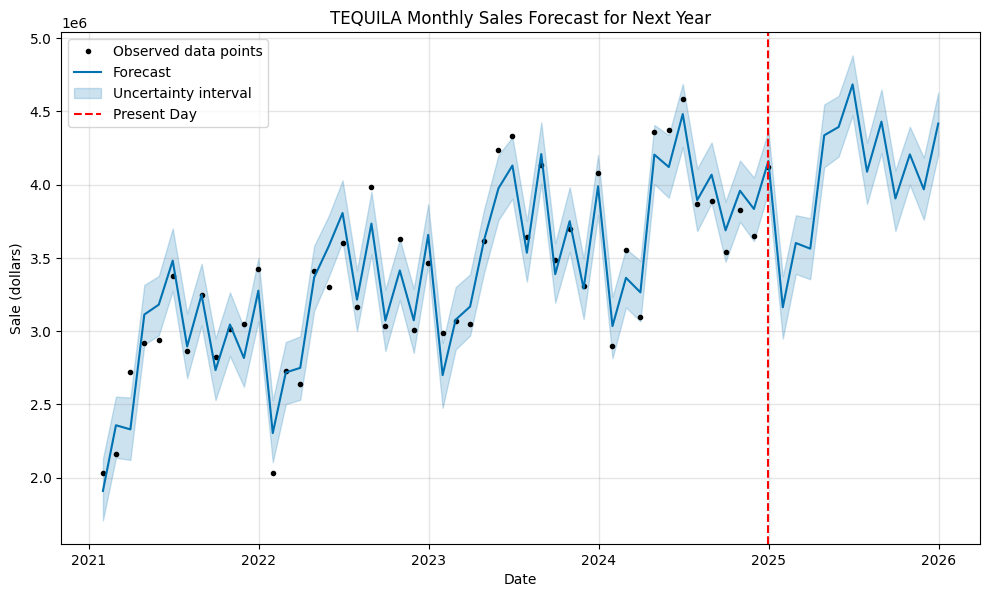

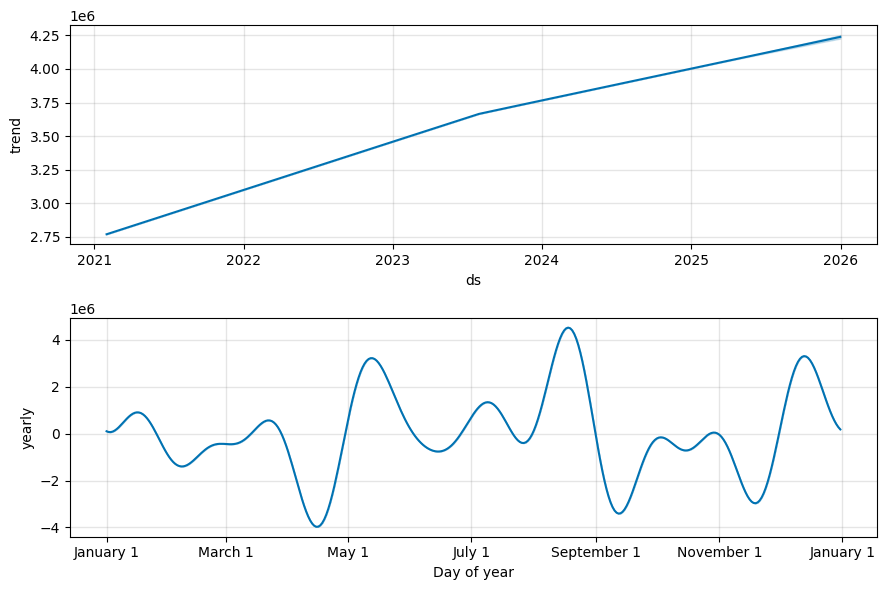

In [ ]:

# -------------------------------
# 1. Data Preparation (Monthly)
# -------------------------------
# Filter the dataset for TEQUILA (assuming an 'alcohol_type' column exists)
tequila_df = data_post_covid[data_post_covid['alcohol_type'] == 'TEQUILA'].copy()

# Ensure the date column is in datetime format
tequila_df['date'] = pd.to_datetime(tequila_df['date'])

# Aggregate monthly sales using the 'sale_(dollars)' column
monthly_sales = tequila_df.groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)'].sum().reset_index()

# Rename columns for Prophet: 'ds' for the date and 'y' for the target variable
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# -------------------------------
# 2. Train-Test Split
# -------------------------------
# Use data before 2023 as training data and data from 2023 onward as test data.
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# -------------------------------
# 3. Modeling & Forecasting on Test Set (Monthly)
# -------------------------------
# Fit the Prophet model on the training set
model = Prophet()
model.fit(train)

# Create a future dataframe covering the test period. The number of periods equals the number of months in the test set.
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Extract forecasted values corresponding to the test period
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()

# -------------------------------
# 4. Evaluation Metrics
# -------------------------------
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(test['y'].values, forecast_test['yhat'].values)
mae_val = mean_absolute_error(test['y'], forecast_test['yhat'])
rmse_val = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))

print("Evaluation Metrics on Monthly Test Data:")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# -------------------------------
# 5. Forecasting the Next Year (Monthly) and Plotting
# -------------------------------
# Re-fit Prophet on the full monthly dataset
model_full = Prophet()
model_full.fit(monthly_sales)

# Forecast for the next 12 months
future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

# Plot the forecast for the next year
fig1 = model_full.plot(forecast_full)
ax = fig1.gca()

# Mark the present day as the last observed month in the historical data
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')

# Add legend and labels
ax.legend()
plt.title('TEQUILA Monthly Sales Forecast for Next Year')
plt.xlabel('Date')
plt.ylabel('Sale (dollars)')
plt.show()

# Optionally, plot forecast components (trend, seasonality, etc.)
fig2 = model_full.plot_components(forecast_full)
plt.show()


MAPE: 13.15%

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/_nx1xl9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/f3dm3dxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29294', 'data', 'file=/tmp/tmp4aikjmf5/_nx1xl9y.json', 'init=/tmp/tmp4aikjmf5/f3dm3dxq.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modeloo42ck7a/prophet_model-20250309152557.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:25:57 - cmdstanpy - INFO - Chain [1] start processing
I

Evaluation Metrics on Monthly Test Data with US Holidays:
MAPE: 13.25%
MAE: 465899.98
RMSE: 537050.90


15:25:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


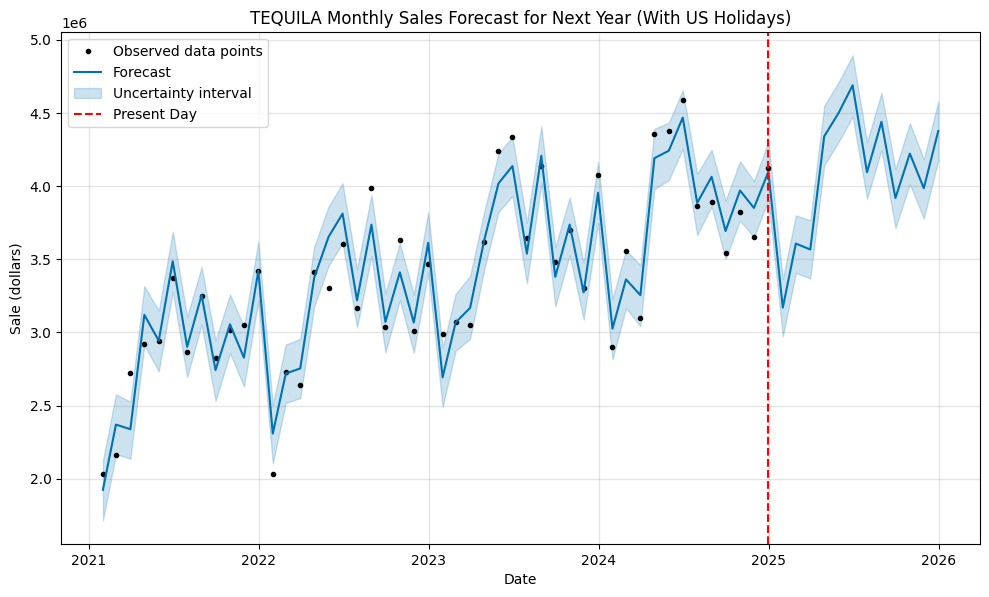

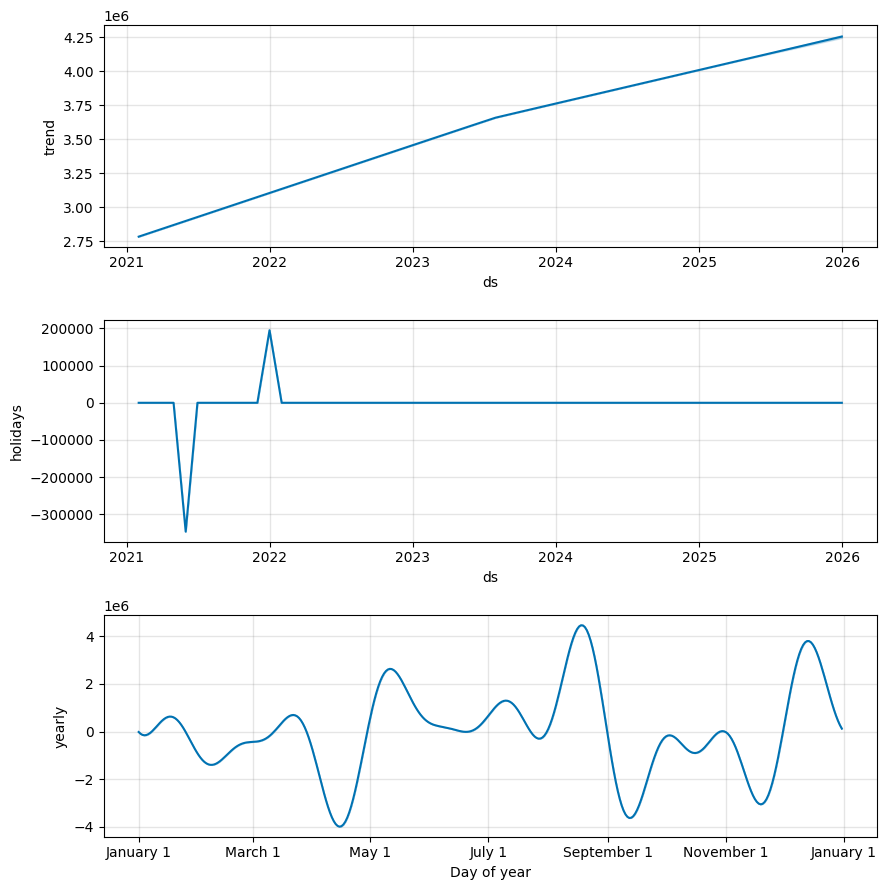

Holidays added by Prophet for US:
0                                      New Year's Day
1                                        Memorial Day
2                Juneteenth National Independence Day
3                                    Independence Day
4                                           Labor Day
5                                        Veterans Day
6                                        Thanksgiving
7                                       Christmas Day
8                          Martin Luther King Jr. Day
9                               Washington's Birthday
10                                       Columbus Day
11                          New Year's Day (observed)
12    Juneteenth National Independence Day (observed)
13                        Independence Day (observed)
14                           Christmas Day (observed)
15                            Veterans Day (observed)
dtype: object


In [ ]:
# -------------------------------
# 1. Data Preparation (Monthly)
# -------------------------------
# Filter for TEQUILA (assuming an 'alcohol_type' column exists)
tequila_df = data_post_covid[data_post_covid['alcohol_type'] == 'TEQUILA'].copy()

# Convert the date column to datetime
tequila_df['date'] = pd.to_datetime(tequila_df['date'])

# Aggregate monthly sales using the 'sale_(dollars)' column
monthly_sales = tequila_df.groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)'].sum().reset_index()

# Rename columns for Prophet: 'ds' for the date and 'y' for the target variable
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# -------------------------------
# 2. Train-Test Split
# -------------------------------
# Use data before 2023 as training data and data from 2023 onward as test data.
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# -------------------------------
# 3. Modeling & Forecasting on Test Set (Monthly with US Holidays)
# -------------------------------
# Initialize the Prophet model and add US holidays
model = Prophet()
model.add_country_holidays(country_name='US')

# Fit the model on the training set
model.fit(train)

# Create a future dataframe covering the test period
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Extract forecasted values corresponding to the test period
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()

# -------------------------------
# 4. Evaluation Metrics
# -------------------------------
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(test['y'].values, forecast_test['yhat'].values)
mae_val = mean_absolute_error(test['y'], forecast_test['yhat'])
rmse_val = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))

print("Evaluation Metrics on Monthly Test Data with US Holidays:")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# -------------------------------
# 5. Forecasting the Next Year (Monthly) and Plotting
# -------------------------------
# Re-fit Prophet on the full monthly dataset with US holidays
model_full = Prophet()
model_full.add_country_holidays(country_name='US')
model_full.fit(monthly_sales)

# Forecast for the next 12 months
future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

# Plot the forecast for the next year
fig1 = model_full.plot(forecast_full)
ax = fig1.gca()

# Mark the present day as the last observed month in the historical data
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')

# Add legend and labels
ax.legend()
plt.title('TEQUILA Monthly Sales Forecast for Next Year (With US Holidays)')
plt.xlabel('Date')
plt.ylabel('Sale (dollars)')
plt.show()

# Optionally, plot forecast components (trend, seasonality, holiday effects, etc.)
fig2 = model_full.plot_components(forecast_full)
plt.show()

# -------------------------------
# 6. Inspecting the Holidays DataFrame
# -------------------------------
# After fitting, you can also inspect the holidays that Prophet added
# by looking at the 'train_holiday_names' in the model.
print("Holidays added by Prophet for US:")
print(model_full.train_holiday_names)


Including US holidays -  MAPE: 13.25%

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/1n9repnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/kf6ig68y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1807', 'data', 'file=/tmp/tmp4aikjmf5/1n9repnf.json', 'init=/tmp/tmp4aikjmf5/kf6ig68y.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_model_66jg3ks/prophet_model-20250309152602.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:26:02 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics on Monthly Test Data (Log Transform + US Holidays):
MAPE: 10.55%
MAE: 401090.35
RMSE: 490741.23


15:26:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


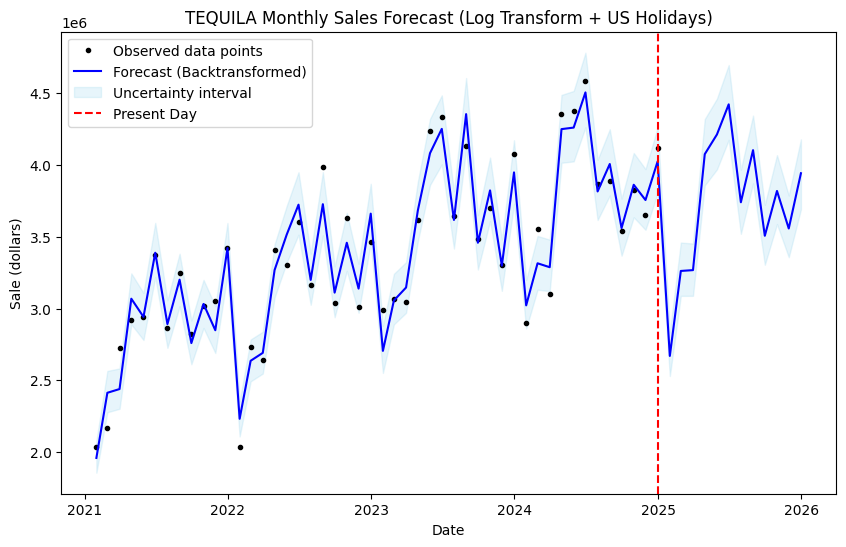

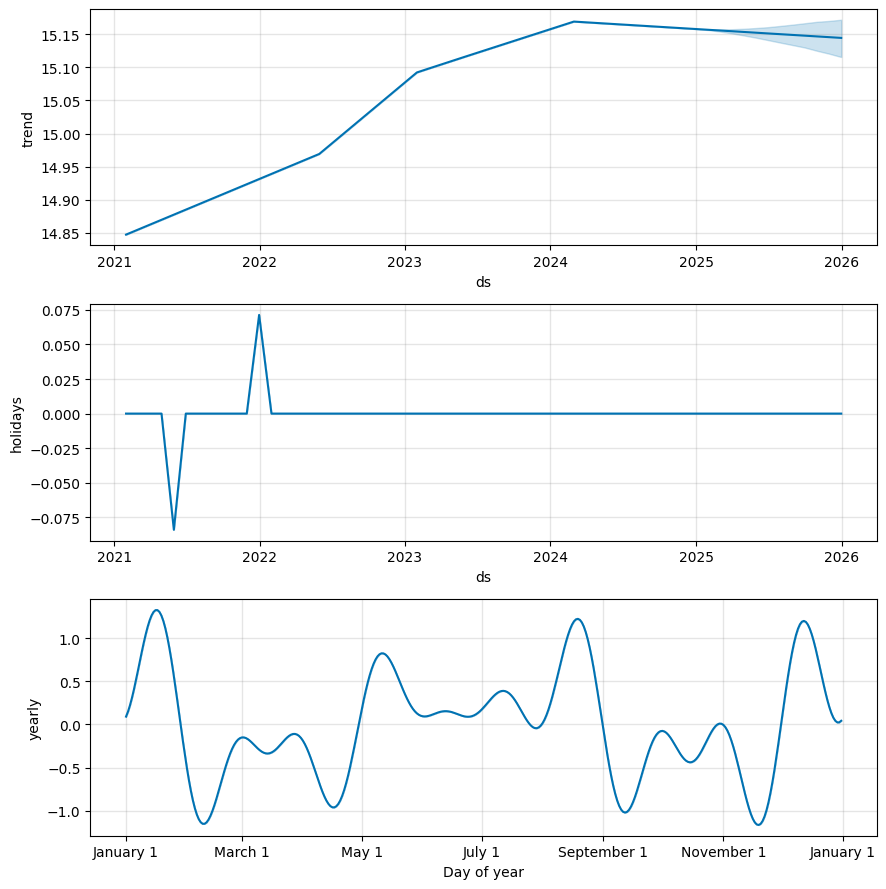

In [ ]:
# -------------------------------
# 1. Data Preparation (Monthly)
# -------------------------------
# Filter the dataset for TEQUILA (assuming 'alcohol_type' column)
tequila_df = data_post_covid[data_post_covid['alcohol_type'] == 'TEQUILA'].copy()

# Convert the date column to datetime
tequila_df['date'] = pd.to_datetime(tequila_df['date'])

# Aggregate monthly sales using the 'sale_(dollars)' column
monthly_sales = (
    tequila_df
    .groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)']
    .sum()
    .reset_index()
)

# Rename columns for Prophet: 'ds' for the date and 'y' for the target variable
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# (Optional) Filter out rows where y <= 0 if you have non-positive values
# monthly_sales = monthly_sales[monthly_sales['y'] > 0]

# -------------------------------
# 2. Apply Log Transform
# -------------------------------
# We'll keep an original copy for later evaluation
monthly_sales['y_orig'] = monthly_sales['y'].values

# Use np.log1p to handle zeros gracefully (log(1 + y))
monthly_sales['y'] = np.log1p(monthly_sales['y_orig'])

# -------------------------------
# 3. Train-Test Split
# -------------------------------
# Example: Use data before 2023 as training, 2023+ as test
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# -------------------------------
# 4. Modeling & Forecasting on Test Set (Monthly with US Holidays, Log Scale)
# -------------------------------
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

# Create a future dataframe covering the test period
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Invert the log transform for forecasted values
# forecast['yhat'] is in log scale, so we exponentiate (minus 1) to get back to original scale
forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_backtransformed'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_backtransformed'] = np.expm1(forecast['yhat_upper'])

# -------------------------------
# 5. Evaluation on Test Set (Original Scale)
# -------------------------------
# Merge forecast with test set on ds
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()
test_eval = pd.merge(
    test[['ds', 'y_orig']],
    forecast_test[['ds', 'yhat_backtransformed']],
    on='ds'
)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(test_eval['y_orig'], test_eval['yhat_backtransformed'])
mae_val = mean_absolute_error(test_eval['y_orig'], test_eval['yhat_backtransformed'])
rmse_val = np.sqrt(mean_squared_error(test_eval['y_orig'], test_eval['yhat_backtransformed']))

print("Evaluation Metrics on Monthly Test Data (Log Transform + US Holidays):")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# -------------------------------
# 6. Full Model & Future Forecast (Next 12 Months)
# -------------------------------
# Re-fit on the full dataset (all dates) in log scale
model_full = Prophet()
model_full.add_country_holidays(country_name='US')
model_full.fit(monthly_sales)

# Make a future dataframe for the next 12 months
future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

# Backtransform forecasted values
forecast_full['yhat_backtransformed'] = np.expm1(forecast_full['yhat'])
forecast_full['yhat_lower_backtransformed'] = np.expm1(forecast_full['yhat_lower'])
forecast_full['yhat_upper_backtransformed'] = np.expm1(forecast_full['yhat_upper'])

# -------------------------------
# 7. Plotting Forecast in Original Scale
# -------------------------------
fig, ax = plt.subplots(figsize=(10,6))

# Plot the historical data (original scale)
ax.plot(
    monthly_sales['ds'],
    monthly_sales['y_orig'],
    'k.',
    label='Observed data points'
)

# Plot the forecast (backtransformed)
ax.plot(
    forecast_full['ds'],
    forecast_full['yhat_backtransformed'],
    label='Forecast (Backtransformed)',
    color='blue'
)

# Plot uncertainty intervals (backtransformed)
ax.fill_between(
    forecast_full['ds'],
    forecast_full['yhat_lower_backtransformed'],
    forecast_full['yhat_upper_backtransformed'],
    alpha=0.2,
    label='Uncertainty interval',
    color='skyblue'
)

# Mark the present day (last observed month in the historical data)
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')

# Customize labels
ax.set_title('TEQUILA Monthly Sales Forecast (Log Transform + US Holidays)')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend()

plt.show()

# Optionally, you can still look at the log-scale components
fig2 = model_full.plot_components(forecast_full)
plt.show()


With the log to stabilize the variance - MAPE: 10.55%

We also tried starting at 2022 and MAPE incresed to: 29.01%. So for the rest of the categories we'll include US holidays and the log.

**Tequila:** The forecast indicates a steady upward trend in sales with seasonal peaks and a temporary drop around early 2025 before recovering. Holiday effects appear to contribute to fluctuations.

### Bourbon

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/eehbl52d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/mxruf1_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38086', 'data', 'file=/tmp/tmp4aikjmf5/eehbl52d.json', 'init=/tmp/tmp4aikjmf5/mxruf1_b.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modeloggjca0a/prophet_model-20250309152605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:26:05 - cmdstanpy - INFO - Chain [1] start processing
I

Bourbon Evaluation Metrics:
MAPE: 51.13%
MAE: 1822082.00
RMSE: 2045856.82


15:26:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


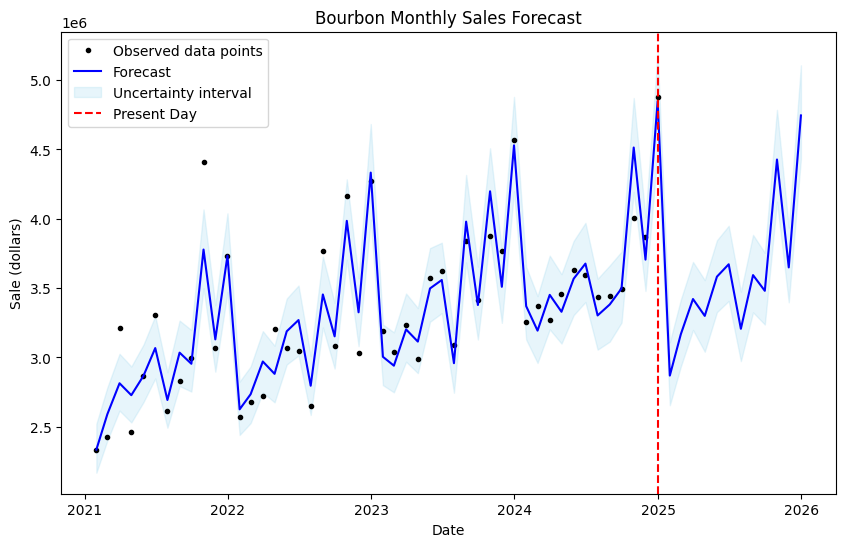

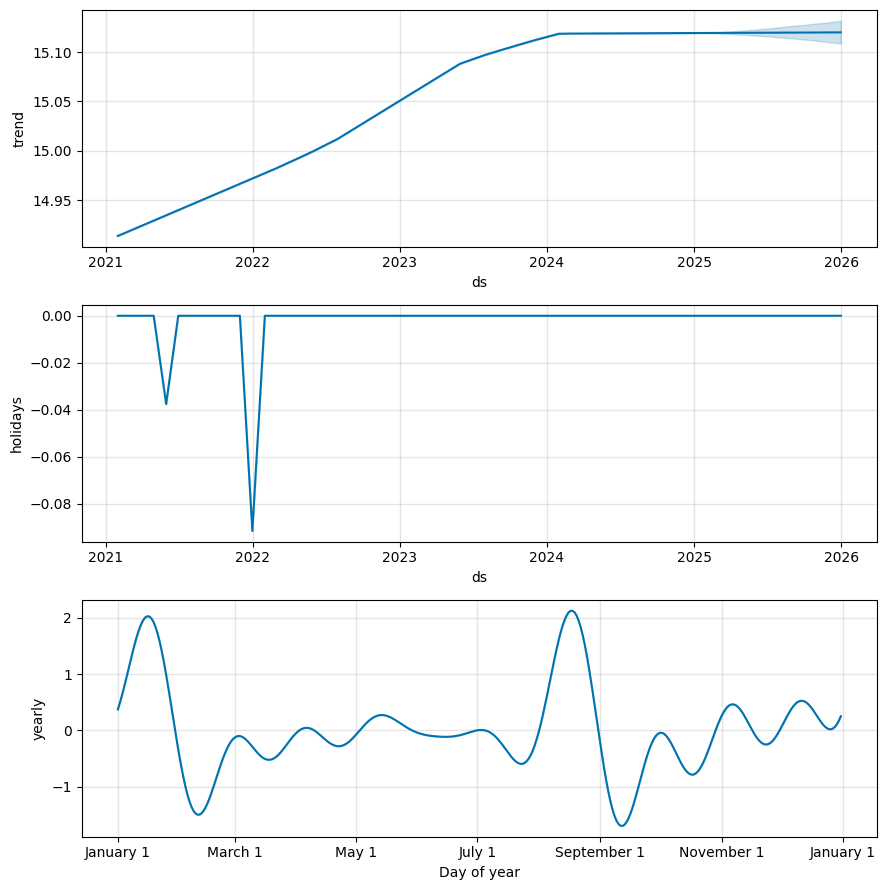

In [ ]:

# Filter the dataset for BOURBON
bourbon_df = data_post_covid[data_post_covid['alcohol_type'] == 'BOURBON'].copy()

# Convert the date column to datetime
bourbon_df['date'] = pd.to_datetime(bourbon_df['date'])

# Aggregate monthly sales
monthly_sales = bourbon_df.groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)'].sum().reset_index()

# Rename columns for Prophet
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# Apply log transform
monthly_sales['y_orig'] = monthly_sales['y'].values
monthly_sales['y'] = np.log1p(monthly_sales['y_orig'])

# Train-test split
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# Modeling and forecasting with US holidays and log transform
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_backtransformed'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_backtransformed'] = np.expm1(forecast['yhat_upper'])

# Evaluation
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()
test_eval = pd.merge(test[['ds', 'y_orig']], forecast_test[['ds', 'yhat_backtransformed']], on='ds')

mape_val = mape(test_eval['y_orig'], test_eval['yhat_backtransformed'])
mae_val = mean_absolute_error(test_eval['y_orig'], test_eval['yhat_backtransformed'])
rmse_val = np.sqrt(mean_squared_error(test_eval['y_orig'], test_eval['yhat_backtransformed']))

print("Bourbon Evaluation Metrics:")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# Full model and future forecast
model_full = Prophet()
model_full.add_country_holidays(country_name='US')
model_full.fit(monthly_sales)

future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

forecast_full['yhat_backtransformed'] = np.expm1(forecast_full['yhat'])
forecast_full['yhat_lower_backtransformed'] = np.expm1(forecast_full['yhat_lower'])
forecast_full['yhat_upper_backtransformed'] = np.expm1(forecast_full['yhat_upper'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales['ds'], monthly_sales['y_orig'], 'k.', label='Observed data points')
ax.plot(forecast_full['ds'], forecast_full['yhat_backtransformed'], label='Forecast', color='blue')
ax.fill_between(forecast_full['ds'], forecast_full['yhat_lower_backtransformed'], forecast_full['yhat_upper_backtransformed'], alpha=0.2, label='Uncertainty interval', color='skyblue')
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')
ax.set_title('Bourbon Monthly Sales Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend()
plt.show()

fig2 = model_full.plot_components(forecast_full)
plt.show()


**Bourbon:** Sales projections show a generally increasing trend with recurring seasonal spikes. A major peak is expected in early 2025, followed by a short-term decline and recovery. Past data suggests occasional negative holiday impacts.

### Whiskies

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/_46_tjdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/5picwnyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13035', 'data', 'file=/tmp/tmp4aikjmf5/_46_tjdh.json', 'init=/tmp/tmp4aikjmf5/5picwnyr.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modelzi_trshc/prophet_model-20250309152610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:26:10 - cmdstanpy - INFO - Chain [1] start processing
I

Whiskies Evaluation Metrics:
MAPE: 89.67%
MAE: 7425887.72
RMSE: 8464135.68


15:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


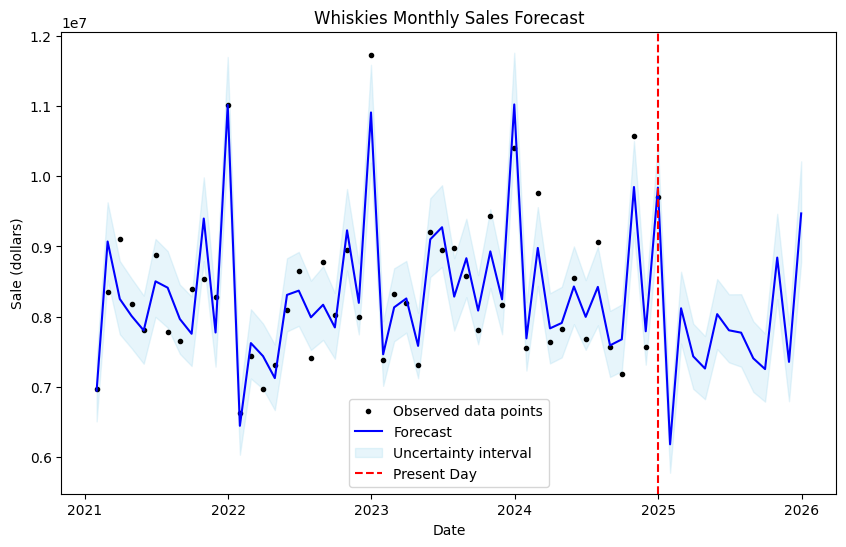

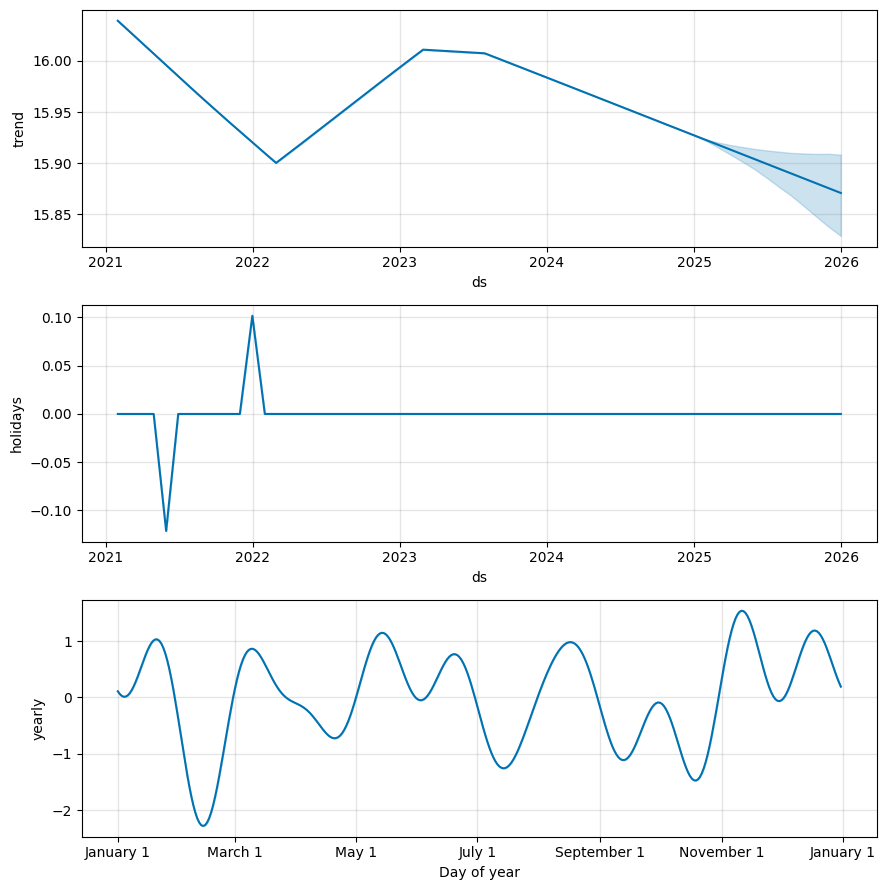

In [ ]:
# Filter the dataset for WHISKIES
whiskies_df = data_post_covid[data_post_covid['alcohol_type'] == 'WHISKIES'].copy()

# Convert the date column to datetime
whiskies_df['date'] = pd.to_datetime(whiskies_df['date'])

# Aggregate monthly sales
monthly_sales = whiskies_df.groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)'].sum().reset_index()

# Rename columns for Prophet
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# Apply log transform
monthly_sales['y_orig'] = monthly_sales['y'].values
monthly_sales['y'] = np.log1p(monthly_sales['y_orig'])

# Train-test split
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# Modeling and forecasting with US holidays and log transform
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_backtransformed'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_backtransformed'] = np.expm1(forecast['yhat_upper'])

# Evaluation
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()
test_eval = pd.merge(test[['ds', 'y_orig']], forecast_test[['ds', 'yhat_backtransformed']], on='ds')

mape_val = mape(test_eval['y_orig'], test_eval['yhat_backtransformed'])
mae_val = mean_absolute_error(test_eval['y_orig'], test_eval['yhat_backtransformed'])
rmse_val = np.sqrt(mean_squared_error(test_eval['y_orig'], test_eval['yhat_backtransformed']))

print("Whiskies Evaluation Metrics:")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# Full model and future forecast
model_full = Prophet()
model_full.add_country_holidays(country_name='US')
model_full.fit(monthly_sales)

future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

forecast_full['yhat_backtransformed'] = np.expm1(forecast_full['yhat'])
forecast_full['yhat_lower_backtransformed'] = np.expm1(forecast_full['yhat_lower'])
forecast_full['yhat_upper_backtransformed'] = np.expm1(forecast_full['yhat_upper'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales['ds'], monthly_sales['y_orig'], 'k.', label='Observed data points')
ax.plot(forecast_full['ds'], forecast_full['yhat_backtransformed'], label='Forecast', color='blue')
ax.fill_between(forecast_full['ds'], forecast_full['yhat_lower_backtransformed'], forecast_full['yhat_upper_backtransformed'], alpha=0.2, label='Uncertainty interval', color='skyblue')
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')
ax.set_title('Whiskies Monthly Sales Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend()
plt.show()

fig2 = model_full.plot_components(forecast_full)
plt.show()


**Whiskies:** The forecast reflects stable but fluctuating sales with periodic peaks. However, a slight decline is projected after 2024, with early 2025 showing a significant drop before a partial recovery.

### Liqueurs

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/f9a4kctv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/m8dtcql0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63774', 'data', 'file=/tmp/tmp4aikjmf5/f9a4kctv.json', 'init=/tmp/tmp4aikjmf5/m8dtcql0.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_model4jupcede/prophet_model-20250309152616.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:26:16 - cmdstanpy - INFO - Chain [1] start processing
I

Liqueurs Evaluation Metrics:
MAPE: 127.71%
MAE: 5657238.60
RMSE: 6487445.84


15:26:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


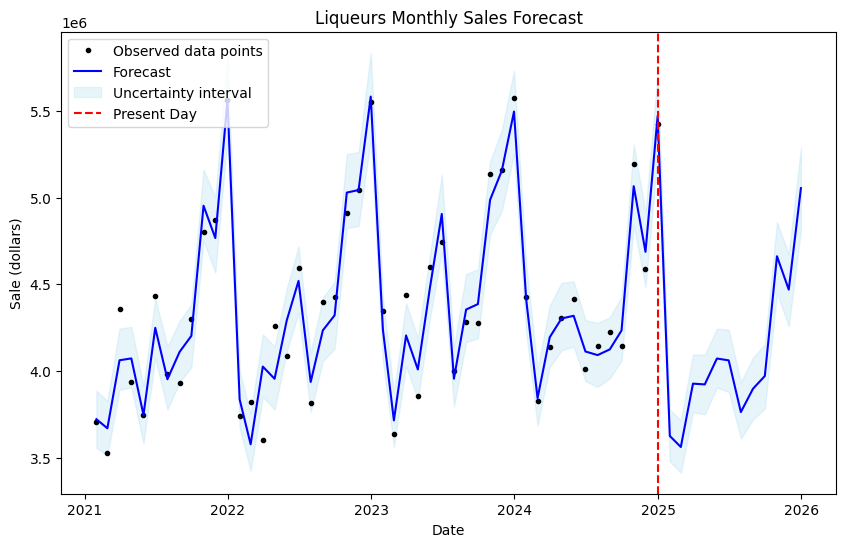

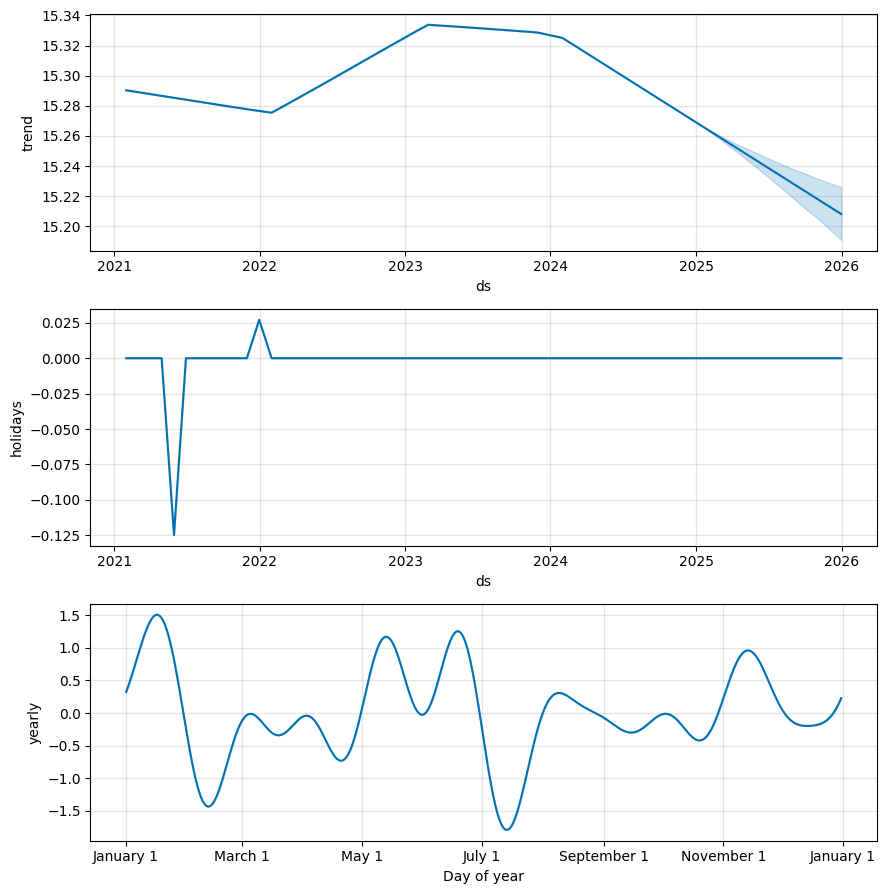

In [ ]:
# Filter the dataset for LIQUEURS
liqueurs_df = data_post_covid[data_post_covid['alcohol_type'] == 'LIQUEURS'].copy()

# Convert the date column to datetime
liqueurs_df['date'] = pd.to_datetime(liqueurs_df['date'])

# Aggregate monthly sales
monthly_sales = liqueurs_df.groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)'].sum().reset_index()

# Rename columns for Prophet
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# Apply log transform
monthly_sales['y_orig'] = monthly_sales['y'].values
monthly_sales['y'] = np.log1p(monthly_sales['y_orig'])

# Train-test split
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# Modeling and forecasting with US holidays and log transform
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_backtransformed'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_backtransformed'] = np.expm1(forecast['yhat_upper'])

# Evaluation
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()
test_eval = pd.merge(test[['ds', 'y_orig']], forecast_test[['ds', 'yhat_backtransformed']], on='ds')

mape_val = mape(test_eval['y_orig'], test_eval['yhat_backtransformed'])
mae_val = mean_absolute_error(test_eval['y_orig'], test_eval['yhat_backtransformed'])
rmse_val = np.sqrt(mean_squared_error(test_eval['y_orig'], test_eval['yhat_backtransformed']))

print("Liqueurs Evaluation Metrics:")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# Full model and future forecast
model_full = Prophet()
model_full.add_country_holidays(country_name='US')
model_full.fit(monthly_sales)

future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

forecast_full['yhat_backtransformed'] = np.expm1(forecast_full['yhat'])
forecast_full['yhat_lower_backtransformed'] = np.expm1(forecast_full['yhat_lower'])
forecast_full['yhat_upper_backtransformed'] = np.expm1(forecast_full['yhat_upper'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales['ds'], monthly_sales['y_orig'], 'k.', label='Observed data points')
ax.plot(forecast_full['ds'], forecast_full['yhat_backtransformed'], label='Forecast', color='blue')
ax.fill_between(forecast_full['ds'], forecast_full['yhat_lower_backtransformed'], forecast_full['yhat_upper_backtransformed'], alpha=0.2, label='Uncertainty interval', color='skyblue')
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')
ax.set_title('Liqueurs Monthly Sales Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend()
plt.show()

fig2 = model_full.plot_components(forecast_full)
plt.show()


**Liqueurs:** Seasonal spikes are present, but the overall trend suggests limited long-term growth, with a projected decline post-2024. Holiday periods appear to play a role in the fluctuations.

### Vodkas

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/bailbhw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/ryiz3j4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49967', 'data', 'file=/tmp/tmp4aikjmf5/bailbhw7.json', 'init=/tmp/tmp4aikjmf5/ryiz3j4r.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modelxncsdksg/prophet_model-20250309152622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:26:22 - cmdstanpy - INFO - Chain [1] start processing
I

Vodka Evaluation Metrics:
MAPE: 14.47%
MAE: 1216959.62
RMSE: 1508094.98


15:26:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


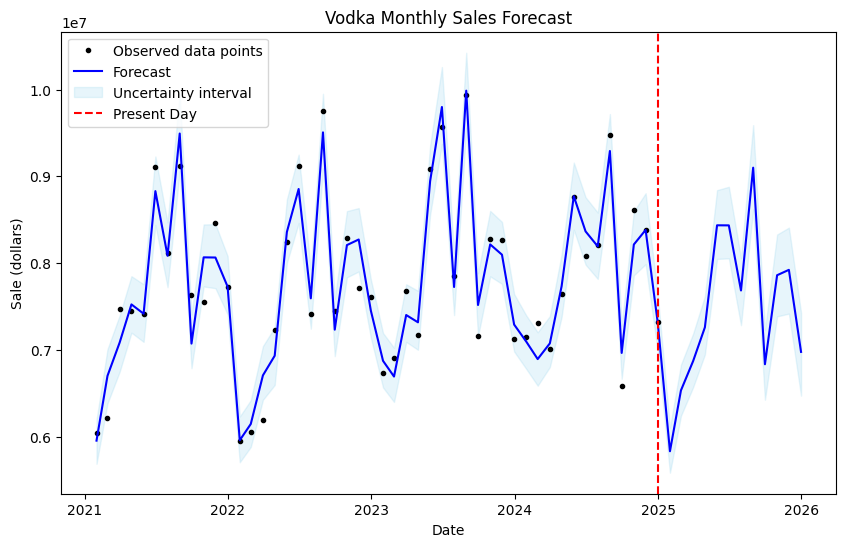

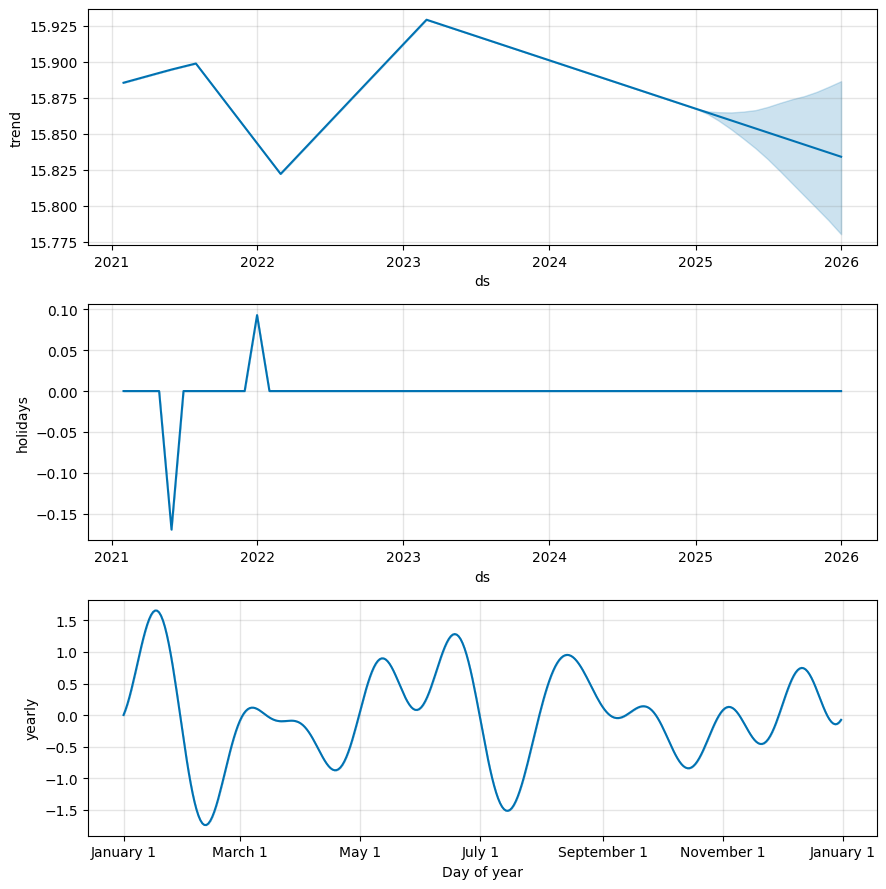

In [ ]:
# Filter the dataset for VODKAS
vodkas_df = data_post_covid[data_post_covid['alcohol_type'] == 'VODKAS'].copy()

# Convert the date column to datetime
vodkas_df['date'] = pd.to_datetime(vodkas_df['date'])

# Aggregate monthly sales
monthly_sales = vodkas_df.groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)'].sum().reset_index()

# Rename columns for Prophet
monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
monthly_sales.sort_values('ds', inplace=True)

# Apply log transform
monthly_sales['y_orig'] = monthly_sales['y'].values
monthly_sales['y'] = np.log1p(monthly_sales['y_orig'])

# Train-test split
train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

# Modeling and forecasting with US holidays and log transform
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_backtransformed'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_backtransformed'] = np.expm1(forecast['yhat_upper'])

# Evaluation
forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()
test_eval = pd.merge(test[['ds', 'y_orig']], forecast_test[['ds', 'yhat_backtransformed']], on='ds')

mape_val = mape(test_eval['y_orig'], test_eval['yhat_backtransformed'])
mae_val = mean_absolute_error(test_eval['y_orig'], test_eval['yhat_backtransformed'])
rmse_val = np.sqrt(mean_squared_error(test_eval['y_orig'], test_eval['yhat_backtransformed']))

print("Vodka Evaluation Metrics:")
print(f"MAPE: {mape_val:.2f}%")
print(f"MAE: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# Full model and future forecast
model_full = Prophet()
model_full.add_country_holidays(country_name='US')
model_full.fit(monthly_sales)

future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)

forecast_full['yhat_backtransformed'] = np.expm1(forecast_full['yhat'])
forecast_full['yhat_lower_backtransformed'] = np.expm1(forecast_full['yhat_lower'])
forecast_full['yhat_upper_backtransformed'] = np.expm1(forecast_full['yhat_upper'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales['ds'], monthly_sales['y_orig'], 'k.', label='Observed data points')
ax.plot(forecast_full['ds'], forecast_full['yhat_backtransformed'], label='Forecast', color='blue')
ax.fill_between(forecast_full['ds'], forecast_full['yhat_lower_backtransformed'], forecast_full['yhat_upper_backtransformed'], alpha=0.2, label='Uncertainty interval', color='skyblue')
last_observed_date = monthly_sales['ds'].max()
ax.axvline(x=last_observed_date, color='red', linestyle='--', label='Present Day')
ax.set_title('Vodka Monthly Sales Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend()
plt.show()

fig2 = model_full.plot_components(forecast_full)
plt.show()

**Vodka:** The forecast highlights consistent seasonal peaks and stability until 2024, with a slight downward trend beyond 2025. Sales are cyclic, with periodic dips and recoveries influenced by seasonal demand.

### Projections Comparison



=== Processing BOURBON ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/0yibl73k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/5ku7vff0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83677', 'data', 'file=/tmp/tmp4aikjmf5/0yibl73k.json', 'init=/tmp/tmp4aikjmf5/5ku7vff0.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_model_241b7j4/prophet_model-20250309153124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:31:24 - cmdstanpy - INFO - Chain [1] start processing
I

BOURBON - MAPE: 14.64%, MAE: 506509.71, RMSE: 567235.62


15:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




=== Processing WHISKIES ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/dx9qoqug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/t0e3islu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95797', 'data', 'file=/tmp/tmp4aikjmf5/dx9qoqug.json', 'init=/tmp/tmp4aikjmf5/t0e3islu.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modelnn21zw8k/prophet_model-20250309153130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:31:30 - cmdstanpy - INFO - Chain [1] start processing
I

WHISKIES - MAPE: 12.03%, MAE: 964326.59, RMSE: 1141955.52


15:31:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




=== Processing LIQUEURS ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/lcu5w7tn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/a3wwyzjr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54228', 'data', 'file=/tmp/tmp4aikjmf5/lcu5w7tn.json', 'init=/tmp/tmp4aikjmf5/a3wwyzjr.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modelhamnf27s/prophet_model-20250309153135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:31:35 - cmdstanpy - INFO - Chain [1] start processing
I

LIQUEURS - MAPE: 18.71%, MAE: 784588.39, RMSE: 905030.50


15:31:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




=== Processing VODKAS ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/0uq27k6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/tbgxlky5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53462', 'data', 'file=/tmp/tmp4aikjmf5/0uq27k6g.json', 'init=/tmp/tmp4aikjmf5/tbgxlky5.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modeldvvad9ny/prophet_model-20250309153141.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:31:41 - cmdstanpy - INFO - Chain [1] start processing
I

VODKAS - MAPE: 12.42%, MAE: 942118.12, RMSE: 1090813.51


15:31:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




=== Processing TEQUILA ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/sgkycfkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4aikjmf5/a7h2ov43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13482', 'data', 'file=/tmp/tmp4aikjmf5/sgkycfkf.json', 'init=/tmp/tmp4aikjmf5/a7h2ov43.json', 'output', 'file=/tmp/tmp4aikjmf5/prophet_modelnp5pcr3j/prophet_model-20250309153143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:31:43 - cmdstanpy - INFO - Chain [1] start processing
I

TEQUILA - MAPE: 13.25%, MAE: 465899.98, RMSE: 537050.90


15:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


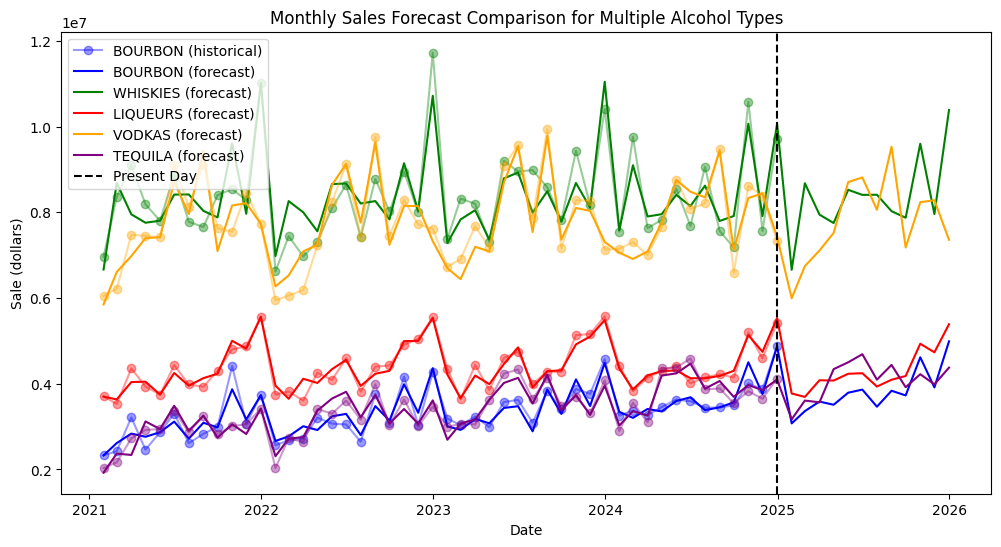

In [ ]:
# Define the list of alcohol types you want to compare
alcohol_types = ['BOURBON', 'WHISKIES', 'LIQUEURS', 'VODKAS', 'TEQUILA']

# Dictionary to store forecasts and historical data for each category
forecasts_dict = {}
history_dict = {}

# Loop over each alcohol type
for cat in alcohol_types:
    print(f"\n\n=== Processing {cat} ===")

    # -------------------------------
    # 1. Filter Data & Prepare (Monthly)
    # -------------------------------
    # Filter data for the current alcohol type
    df_cat = data_post_covid[data_post_covid['alcohol_type'] == cat].copy()

    # Convert date to datetime
    df_cat['date'] = pd.to_datetime(df_cat['date'])

    # Aggregate monthly sales
    monthly_sales = (
        df_cat
        .groupby(pd.Grouper(key='date', freq='M'))['sale_(dollars)']
        .sum()
        .reset_index()
    )

    # Rename columns for Prophet
    monthly_sales.rename(columns={'date': 'ds', 'sale_(dollars)': 'y'}, inplace=True)
    monthly_sales.sort_values('ds', inplace=True)

    # Keep an original copy for plotting / evaluation
    monthly_sales['y_orig'] = monthly_sales['y'].values

    # (Optional) log transform if you want to stabilize variance
    # monthly_sales['y'] = np.log1p(monthly_sales['y_orig'])

    # -------------------------------
    # 2. Train-Test Split
    # -------------------------------
    train = monthly_sales[monthly_sales['ds'] < '2023-01-01']
    test = monthly_sales[monthly_sales['ds'] >= '2023-01-01']

    # -------------------------------
    # 3. Model & Forecast on Test Set
    # -------------------------------
    model = Prophet()
    model.add_country_holidays(country_name='US')
    model.fit(train)

    future = model.make_future_dataframe(periods=len(test), freq='M')
    forecast = model.predict(future)

    # If you used log transform above, you'd backtransform here:
    # forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
    # ...
    # For simplicity, let's assume no log transform here:
    forecast['yhat_backtransformed'] = forecast['yhat']
    forecast['yhat_lower_backtransformed'] = forecast['yhat_lower']
    forecast['yhat_upper_backtransformed'] = forecast['yhat_upper']

    # Evaluation on test set
    forecast_test = forecast[forecast['ds'].isin(test['ds'])].copy()
    test_eval = pd.merge(
        test[['ds', 'y_orig']],
        forecast_test[['ds', 'yhat_backtransformed']],
        on='ds'
    )

    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape_val = mape(test_eval['y_orig'], test_eval['yhat_backtransformed'])
    mae_val = mean_absolute_error(test_eval['y_orig'], test_eval['yhat_backtransformed'])
    rmse_val = np.sqrt(mean_squared_error(test_eval['y_orig'], test_eval['yhat_backtransformed']))

    print(f"{cat} - MAPE: {mape_val:.2f}%, MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}")

    # -------------------------------
    # 4. Full Model Forecast (Next 12 Months)
    # -------------------------------
    model_full = Prophet()
    model_full.add_country_holidays(country_name='US')
    model_full.fit(monthly_sales)

    future_full = model_full.make_future_dataframe(periods=12, freq='M')
    forecast_full = model_full.predict(future_full)

    # If using log, backtransform here; else just rename
    forecast_full['yhat_backtransformed'] = forecast_full['yhat']
    forecast_full['yhat_lower_backtransformed'] = forecast_full['yhat_lower']
    forecast_full['yhat_upper_backtransformed'] = forecast_full['yhat_upper']

    # Store the results so we can plot later
    forecasts_dict[cat] = forecast_full
    history_dict[cat] = monthly_sales

# -------------------------------
# 5. Plot All Forecasts Together
# -------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Colors for each category (optional)
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i, cat in enumerate(alcohol_types):
    color = colors[i % len(colors)]

    # Plot historical data (y_orig) for this category
    ax.plot(
        history_dict[cat]['ds'],
        history_dict[cat]['y_orig'],
        marker='o',
        linestyle='-',
        color=color,
        alpha=0.4,
        label=f"{cat} (historical)" if i == 0 else ""  # Label only once to avoid duplication in legend
    )

    # Plot forecast (yhat_backtransformed)
    ax.plot(
        forecasts_dict[cat]['ds'],
        forecasts_dict[cat]['yhat_backtransformed'],
        linestyle='-',
        color=color,
        label=f"{cat} (forecast)"
    )

# Mark the present day (last observed month among all categories)
last_observed_date = max([history_dict[cat]['ds'].max() for cat in alcohol_types])
ax.axvline(x=last_observed_date, color='black', linestyle='--', label='Present Day')

ax.set_title('Monthly Sales Forecast Comparison for Multiple Alcohol Types')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend(loc='upper left')
plt.show()



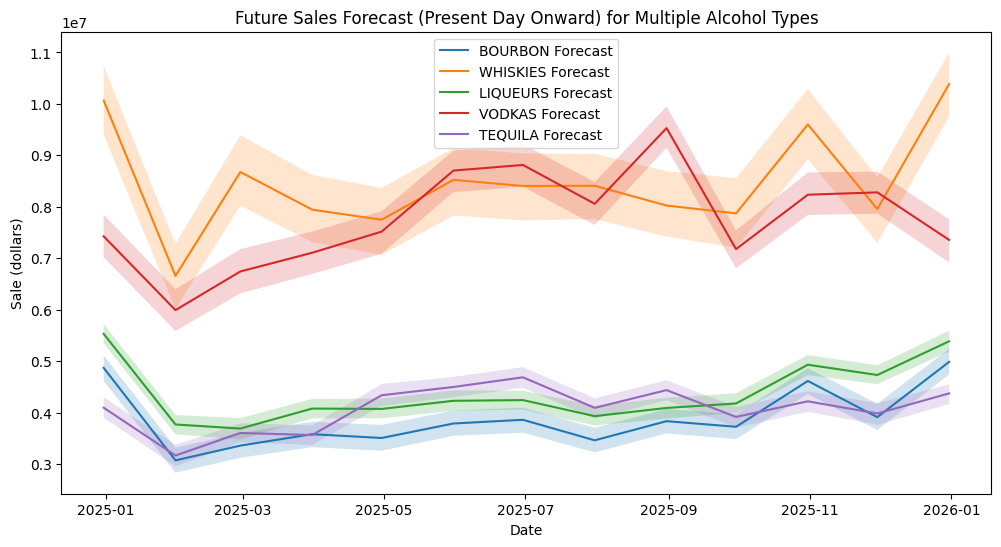

In [ ]:
# First, find the last observed date among all categories (the "present day")
last_observed_date = max([history_dict[cat]['ds'].max() for cat in alcohol_types])

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot only the forecast portion for each alcohol type
for cat in alcohol_types:
    # Get the full forecast for this category
    forecast_cat = forecasts_dict[cat]

    # Filter to only the dates after (or equal to) the last observed date
    forecast_future = forecast_cat[forecast_cat['ds'] >= last_observed_date].copy()

    # Plot the forecast (backtransformed to original scale)
    ax.plot(
        forecast_future['ds'],
        forecast_future['yhat_backtransformed'],
        label=f"{cat} Forecast"
    )

    # Optionally, fill the uncertainty intervals
    ax.fill_between(
        forecast_future['ds'],
        forecast_future['yhat_lower_backtransformed'],
        forecast_future['yhat_upper_backtransformed'],
        alpha=0.2
    )

# Customize labels
ax.set_title('Future Sales Forecast (Present Day Onward) for Multiple Alcohol Types')
ax.set_xlabel('Date')
ax.set_ylabel('Sale (dollars)')
ax.legend(loc='best')
plt.show()


- Early 2025 Decline: All alcohol categories experience a drop after New Year’s Day, likely due to a post-holiday demand slowdown.
- Seasonal Peaks: Sales generally recover and peak around major holidays, especially Independence Day, Thanksgiving, and Christmas.
- Late-Year Growth: Q4 (October-December) sees the strongest sales for most categories, reinforcing the importance of holiday-driven consumption.
- Long-Term Outlook: Despite short-term dips, no category shows a long-term decline, suggesting overall market stability.

**Volatility Differences**
- Whiskies and Vodka have the most extreme fluctuations, indicating higher demand shifts during holiday periods.
- Tequila, Bourbon, and Liqueurs have more stable, gradual trends.



***Alcohol Type: ***

**Whiskies:**
Starts at a high level, experiences a sharp drop in early 2025, and then fluctuates throughout the year.
Maintains the highest overall sales, but with significant volatility.

**Vodka:**
Shows a similar pattern to whiskies, with a temporary decline followed by recovery.
The uncertainty range is smaller, indicating a more stable trend compared to whiskies.

**Tequila:**
Displays a steadier growth pattern, avoiding extreme fluctuations.
Sales remain moderate but increase gradually.

**Bourbon & Liqueurs:**
Both categories follow a more stable upward trend with smaller fluctuations.
Less volatile than whiskies and vodka, indicating consistent demand.


In [ ]:
start_date = '2025-01-01'
end_date   = '2025-12-31'

growth_rates = {}

for cat in alcohol_types:  # e.g., ['BOURBON', 'WHISKIES', 'LIQUEURS', 'VODKAS', 'TEQUILA']
    forecast_cat = forecasts_dict[cat].copy()

    # Filter the forecast to the chosen period
    # We'll assume 'ds' is monthly. So let's grab the earliest forecast >= start_date
    # and the latest forecast <= end_date.
    mask_start = forecast_cat['ds'] >= start_date
    mask_end = forecast_cat['ds'] <= end_date

    forecast_in_range = forecast_cat[mask_start & mask_end].sort_values('ds')

    # If there's not enough data (e.g., no monthly points in 2025), skip
    if forecast_in_range.empty:
        growth_rates[cat] = None
        continue

    # Identify the first forecast month in 2025
    first_row = forecast_in_range.iloc[0]
    # Identify the last forecast month in 2025
    last_row  = forecast_in_range.iloc[-1]

    # If you used a log transform earlier, your final forecast column might be
    # yhat_backtransformed. Otherwise, it might just be yhat.
    # Adjust accordingly.
    start_val = first_row['yhat_backtransformed']
    end_val   = last_row['yhat_backtransformed']

    # Compute percentage growth: ((end - start) / start) * 100
    growth_rate = ((end_val - start_val) / start_val) * 100

    growth_rates[cat] = growth_rate

# Display the results
print("Projected Sales Growth Rates (From Early 2025 to Late 2025):")
for cat in alcohol_types:
    if growth_rates[cat] is None:
        print(f" - {cat}: No forecast data available in this date range.")
    else:
        print(f" - {cat}: {growth_rates[cat]:.2f}%")



Projected Sales Growth Rates (From Early 2025 to Late 2025):
 - BOURBON: 62.25%
 - WHISKIES: 55.97%
 - LIQUEURS: 42.85%
 - VODKAS: 22.76%
 - TEQUILA: 38.08%


In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars = plt.bar(cats, vals, color="#4c3624")  # Set the bar color
plt.ylabel("Growth Rate (%)")
plt.title("Projected Sales Growth from Early 2025 to Late 2025")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.show()

NameError: name 'cats' is not defined

<Figure size 1000x600 with 0 Axes>

- Bourbon and Whiskies lead in projected growth, making them the most dynamic categories in late 2025.
- Tequila and Liqueurs maintain steady, moderate growth, indicating consistent consumer demand.
- Vodka, while stable, has the slowest projected growth, suggesting a less aggressive market expansion.
- Seasonality plays a strong role in all categories, with holiday-driven peaks and post-New Year dips shaping the forecast.
